# International Standard Atmosphere

U.S. Standadar Atmosphere - 1976

Version control

v01 - initial release

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Standard Atmosphere Summary:

| Direct Relations                | Troposphere                                             | Stratosphere                                                           |
| :--                             | :-:                                                     | :-:                                                                    |
| $\delta=\frac{P}{P_{SL}}$       | $\delta=(1+\frac{L}{T_{SL}}(H_c))^{\frac{-g_{SL}}{LR}}$ | $\delta=\delta_{strato-bot}(e^{-\frac{g_{SL}}{RT_{strato-bot}}(H_c-H_{strato-bot})})$ |
| $\sigma=\frac{\rho}{\rho_{SL}}$ | $\sigma=(1+\frac{L}{T_{SL}}(H_c))^{\frac{-g_{SL}}{LR}-1}$ | $\sigma=\sigma_{strato-bot}(e^{-\frac{g_{SL}}{RT_{strato-bot}}(H_c-H_{strato-bot})})$ |
| $\theta=\frac{T}{T_{SL}}$       | $\theta=1+\frac{L}{T_{SL}}(H_c)$                        | $\theta=\frac{T_{strato-bot}}{T_{SL}}$                                  |
| __________________ | ____________________________ | _____________________________________________________________ |
| **Inverse Relations**               |                                                         |                                                                             |
| given pressure       | $H_c=\frac{T_{SL}}{L}(\delta^{-\frac{LR}{g_{SL}}}-1)$ | $H_c=\frac{-RT_{strato-bot}}{g_{SL}}log(\frac{\delta^{(\frac{-g_{SL}}{RT_{strato-bot}}{H_{strato-bot}})}}{\delta_{strato-bot}})$ |
| given density | $H_{\rho}=\frac{T_{SL}}{L}(\sigma^{\frac{1}{\frac{-g_{SL}}{LR}-1}}-1)$ | $H_{\rho}=\frac{-RT_{strato-bot}}{g_{SL}}log(\frac{\sigma^{(\frac{-g_{SL}}{LT_{strato-bot}}{H_{strato-bot}})}}{\sigma_{strato-bot}})$ |
| __________________ | ____________________________ | _____________________________________________________________ |
| Altitude  | $H_{tropo-bot} = 0m$  | $H_{strato-bot}=11000m = ft =36089.24$   |
| Temperature  | $T_{tropo-bot} = 288.15K$  | $T_{strato-bot}=216.65K$  |
| Pressure  | $P_{tropo-bot} = 101325Pa$  | $P_{strato-bot}=22632.06Pa$  |
| Density  | $\rho_{tropo-bot} = 1.225 \frac{kg}{m^3}$  | $\rho_{strato-bot}=0.363918 \frac{kg}{m^3}$  |
| __________________ | ____________________________ | _____________________________________________________________ |


In [4]:
def ISA_delta_non_v(Hc:float)->float:
    '''
    this function calculates 'delta', the ISA pressure ratio, for a given pressure altitude
    limited to top of stratosphere
    inputs:
        Hc: in feet
    outputs:
        'delta'
    '''
    
    # constants
    R = 287.053 # [m2/s2/K]
    g_SL = 9.80665 # [m/s2]
    m2ft = 3.28084
    ft2m = 1 / m2ft

    # define strata

    # troposphere
    L = -6.5 / 1000 #K/m
    Hc_t_tropo = 36089.24 # [ft]
    T_SL = 288.15 # [K]
    p_SL = 101325 # [Pa]
    rho_SL = 1.225 # [kg/m3]

    # stratosphere
    Hc_b_strato = Hc_t_tropo + 0.01 # [ft]
    Hc_t_strato = 65616.8 # [ft]
    T_b_strato = 216.65 # [K]
    p_b_strato = 22632.06 # [Pa]
    delta_b_strato = p_b_strato / p_SL
    
   
    if Hc <= Hc_t_tropo:
        return (1 + (L / T_SL) * ((Hc)*ft2m))**(-g_SL / (L * R))
    elif Hc <= Hc_t_strato:
        return delta_b_strato * np.exp(-(g_SL / (R * T_b_strato))*((Hc - Hc_b_strato)*ft2m))
    else:
        raise ValueError("Altitude above stratospheric limit - outside bounds for this function")
        

In [5]:
# what happens if the function is not vectorized:

h = np.linspace(0, 65000, 65000)
d_ISA = ISA_delta_non_v(h)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
# solution is to use numpy's vectorize:

ISA_delta = np.vectorize(ISA_delta_non_v)

In [7]:
d_ISA = ISA_delta(h)

In [20]:
def ISA_p(Hc:float)->float:
    '''
    this function calculates the ISA pressure, for a given pressure altitude
    limited to top of stratosphere
    inputs:
        Hc: in feet
    outputs:
        p: in Pascals
    '''
    p_SL = 101325 # [Pa]
    
    return ISA_delta(Hc) * p_SL

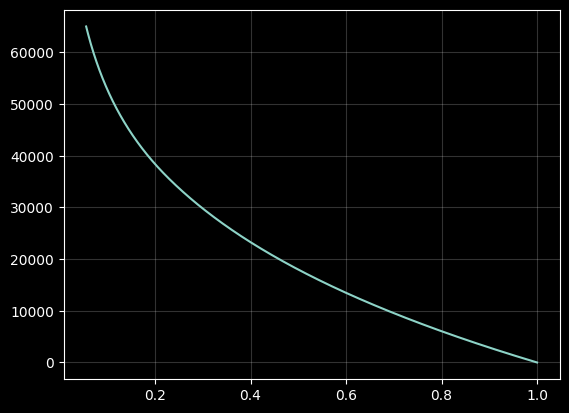

In [9]:
fig, ax = plt.subplots(1)

ax.plot(d_ISA, h) # [non-dimensional] vs [m]
ax.grid(visible=True, alpha=0.2)

plt.show()

In [10]:
def ISA_theta_non_v(Hc:float)->float:
    '''
    this function calculates 'theta', the ISA temperature ratio, for a given pressure altitude
    limited to top of stratosphere
    inputs:
        Hc: in feet
    outputs:
        'theta'
    
    '''
    
    # constants
    m2ft = 3.28084
    ft2m = 1 / m2ft

    # define strata

    # troposphere
    L = -6.5 / 1000 #K/m
    Hc_t_tropo = 36089.24 # [ft]
    T_SL = 288.15 # [K]
    p_SL = 101325 # [Pa]

    # stratosphere
    Hc_b_strato = Hc_t_tropo + 0.01 # [ft]
    Hc_t_strato = 65616.8 # [ft]
    T_b_strato = 216.65 # [K]
    theta_b_strato = T_b_strato / T_SL


    if Hc <= Hc_t_tropo:
        return (1 + (L / T_SL) * ((Hc)*ft2m))
    elif Hc <= Hc_t_strato:
        return theta_b_strato
    else:
        raise ValueError("Altitude above stratospheric limit - outside bounds for this function")
        
ISA_theta = np.vectorize(ISA_theta_non_v)

In [11]:
def ISA_T(Hc:float)->float:
    '''
    this function calculates the ISA temperature, for a given pressure altitude
    limited to top of stratosphere
    inputs:
        Hc: in feet
    outputs:
        T: in Kelvin
    
    '''
    T_SL = 288.15 # [K]

    return ISA_theta(Hc) * T_SL

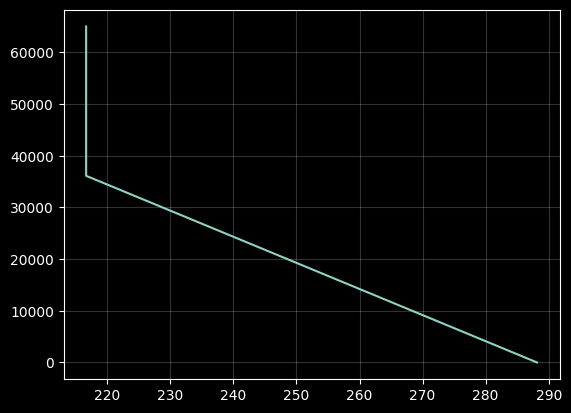

In [12]:
T_ISA = ISA_T(h)
fig, ax = plt.subplots(1)

ax.plot(T_ISA, h) # [K] vs [m]
ax.grid(visible=True, alpha=0.2)

plt.show()

In [13]:
def ISA_sigma_non_v(Hc:float)->float:
    '''
    this function calculates 'sigma', the ISA density ratio, for a given pressure altitude
    limited to top of stratosphere
    inputs:
        Hc: in feet
    outputs:
        'sigma'
    
    '''
    # constants
    R = 287.053 # [m2/s2/K]
    g_SL = 9.80665 # [m/s2]
    m2ft = 3.28084
    ft2m = 1 / m2ft

    # define strata

    # troposphere
    L = -6.5 / 1000 #K/m
    Hc_t_tropo = 36089.24 # [ft]
    T_SL = 288.15 # [K]
    p_SL = 101325 # [Pa]
    rho_SL = 1.225 # [kg/m3]

    # stratosphere
    Hc_b_strato = Hc_t_tropo + 0.01 # [ft]
    Hc_t_strato = 65616.8 # [ft]
    T_b_strato = 216.65 # [K]
    p_b_strato = 22632.06 # [Pa]
    rho_b_strato = 0.36392 # [kg/m3]
    sigma_b_strato = rho_b_strato / rho_SL


    
    if Hc <= Hc_t_tropo:
        return (1 + (L / T_SL) * ((Hc)*ft2m))**(-g_SL / (L * R) - 1)
    elif Hc <= Hc_t_strato:
        return sigma_b_strato * np.exp(-(g_SL / (R * T_b_strato))*((Hc - Hc_b_strato)*ft2m))
    else:
        raise ValueError("Altitude above stratospheric limit - outside bounds for this function")
        
ISA_sigma = np.vectorize(ISA_sigma_non_v)

In [15]:
def ISA_rho(Hc:float)->float:
    '''
    this function calculates the ISA density, for a given pressure altitude
    limited to top of stratosphere
    inputs:
        Hc: in feet
    outputs:
        rho: in kg/m3
    
    '''
    rho_SL = 1.225 # [kg/m3]

    return ISA_sigma(Hc) * rho_SL

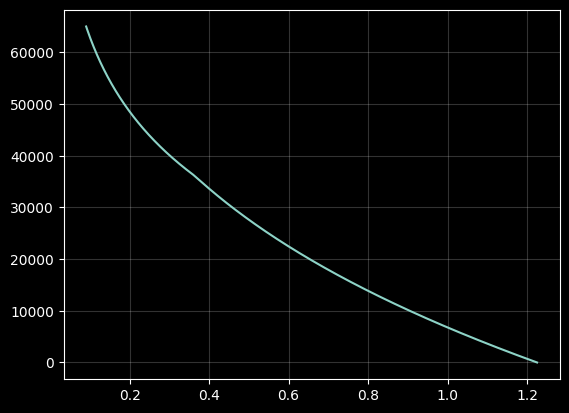

In [16]:
r_ISA = ISA_rho(h)
fig, ax = plt.subplots(1)

ax.plot(r_ISA, h) # [kg/m3] vs [m]
ax.grid(visible=True, alpha=0.2)

plt.show()

In [17]:
def inv_ISA_delta_non_v(delta:float)->float:
    '''
    this function calculates ISA pressure altitude for a given pressure ratio 'delta'
    limited to top of stratosphere
    inputs:
        delta  [non-dimensional]
    outputs:
        Hc: in feet
        
    
    '''
    # constants
    R = 287.053 # [m2/s2/K]
    g_SL = 9.80665 # [m/s2]
    m2ft = 3.28084
    ft2m = 1 / m2ft

    # define strata

    # troposphere
    L = -6.5 / 1000 #K/m
    Hc_t_tropo = 36089.24 # [ft]
    T_SL = 288.15 # [K]
    p_SL = 101325 # [Pa]
    rho_SL = 1.225 # [kg/m3]

    # stratosphere
    Hc_b_strato = Hc_t_tropo + 0.01 # [ft]
    Hc_t_strato = 65616.8 # [ft]
    T_b_strato = 216.65 # [K]
    p_b_strato = 22632.06 # [Pa]
    p_t_strato = 5474.88 # [Pa]
    delta_b_strato = p_b_strato / p_SL
    delta_t_strato = p_t_strato / p_SL


    
    if delta > delta_b_strato:
        return (T_SL / L) * ((delta)**(-(L * R) / g_SL) - 1) * m2ft
    elif delta >= delta_t_strato:
        return ((((-R * T_b_strato) / g_SL) / ft2m) * np.log(((delta) * np.exp((-g_SL / (R * T_b_strato)) * Hc_b_strato * ft2m)) / (p_b_strato / p_SL)))
    else:
        raise ValueError("Pressure/delta lower than stratospheric limit - outside bounds for this function")

inv_ISA_delta = np.vectorize(inv_ISA_delta_non_v)

In [18]:
def inv_ISA_p(p:float)->float:
    '''
    this function calculates the ISA pressure altitude, for a given pressure
    limited to top of stratosphere
    inputs:
        p: in Pascals
    outputs:
        Hc: in feet
    
    '''
    p_SL = 101325 # [Pa]

    return inv_ISA_delta(p / p_SL)

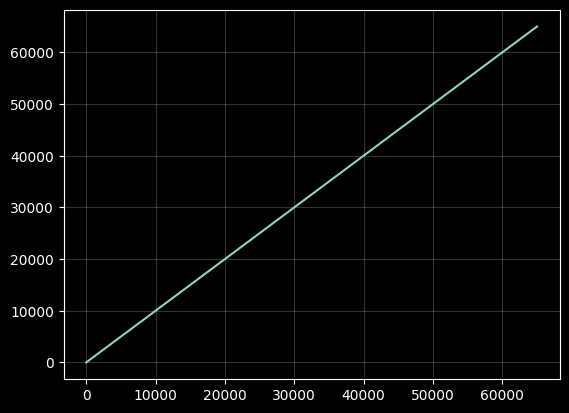

In [21]:
d_ISA = inv_ISA_p(ISA_p(h))
fig, ax = plt.subplots(1)

ax.plot(d_ISA, h) # [m] vs [m]
ax.grid(visible=True, alpha=0.2)

plt.show()

In [26]:
def inv_ISA_sigma_non_v(sigma:float)->float:
    '''
    this function calculates ISA pressure altitude for a given density ratio
    limited to top of stratosphere
    inputs:
        sigma [non-dimensional]
    outputs:
        Hc: in feet
        
    
    '''
    # constants
    R = 287.053 # [m2/s2/K]
    g_SL = 9.80665 # [m/s2]
    m2ft = 3.28084
    ft2m = 1 / m2ft

    # define strata

    # troposphere
    L = -6.5 / 1000 #K/m
    Hc_t_tropo = 36089.24 # [ft]
    T_SL = 288.15 # [K]
    p_SL = 101325 # [Pa]
    rho_SL = 1.225 # [kg/m3]

    # stratosphere
    Hc_b_strato = Hc_t_tropo + 0.01 # [ft]
    Hc_t_strato = 65616.8 # [ft]
    T_b_strato = 216.65 # [K]
    p_b_strato = 22632.06 # [Pa]
    p_t_strato = 5474.88 # [Pa]
    rho_b_strato = 0.36392 # [kg/m3]
    rho_t_strato = 0.08803 #[kg/m3]
    sigma_b_strato = rho_b_strato / rho_SL
    sigma_t_strato = rho_t_strato / rho_SL
    
    if sigma > sigma_b_strato:
        return (T_SL / L)*(((sigma)**(1 / (-g_SL / (L * R) - 1)) - 1))*m2ft #validado
    elif sigma >= sigma_t_strato:
        return ((((R * T_b_strato) / -g_SL) / ft2m) * np.log(((sigma) * np.exp((-g_SL / (R * T_b_strato)) * Hc_b_strato * ft2m)) / (rho_b_strato / rho_SL))) #validado
    else:
        raise ValueError("Density/sigma below stratospheric limit - outside bounds for this function")

inv_ISA_sigma = np.vectorize(inv_ISA_sigma_non_v)

In [24]:
def inv_ISA_rho(rho:float)->float:
    '''
    this function calculates the ISA pressure altitude, for a given density
    limited to top of stratosphere
    inputs:
        rho: in kg/m3
    outputs:
        Hc: in feet
    
    '''
    rho_SL = 1.225 # [kg/m3]
    
    return inv_ISA_sigma(rho / rho_SL)

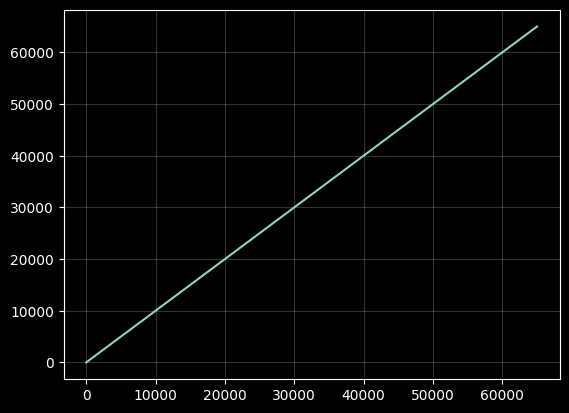

In [27]:
s_ISA = inv_ISA_rho(ISA_rho(h))
fig, ax = plt.subplots(1)

ax.plot(d_ISA, h) # [m] vs [m]
ax.grid(visible=True, alpha=0.2)

plt.show()

In [28]:
altitudes = [0, 1000, 10000, 30000, 36089.2399, 36089.24, 36089.240001, 50000, 65600, 65616.8, 65616.9]

# EXPECT AN ERROR FOR LAST VALUE:

for alt in altitudes:
    print(f'alt={alt}, ISA_delta={ISA_delta(alt):5.4f}, Hc_inv={inv_ISA_p(ISA_p(alt)):3.4f}, rho={ISA_rho(alt):1.4f}')

alt=0, ISA_delta=1.0000, Hc_inv=-0.0000, rho=1.2250
alt=1000, ISA_delta=0.9644, Hc_inv=1000.0000, rho=1.1896
alt=10000, ISA_delta=0.6877, Hc_inv=10000.0000, rho=0.9046
alt=30000, ISA_delta=0.2970, Hc_inv=30000.0000, rho=0.4583
alt=36089.2399, ISA_delta=0.2234, Hc_inv=36089.2541, rho=0.3639
alt=36089.24, ISA_delta=0.2234, Hc_inv=36089.2542, rho=0.3639
alt=36089.240001, ISA_delta=0.2234, Hc_inv=36089.2258, rho=0.3639
alt=50000, ISA_delta=0.1145, Hc_inv=50000.0000, rho=0.1865
alt=65600, ISA_delta=0.0541, Hc_inv=65600.0000, rho=0.0881
alt=65616.8, ISA_delta=0.0540, Hc_inv=65616.8000, rho=0.0880


ValueError: Altitude above stratospheric limit - outside bounds for this function

In [29]:
import ISA_module as ISA

In [30]:
altitudes = [0, 1000, 10000, 30000, 36089.2399, 36089.24, 36089.240001, 50000, 65600, 65616.8, 65616.9]

# EXPECT AN ERROR FOR LAST VALUE:

for alt in altitudes:
    print(f'alt={alt}, ISA_delta={ISA.delta(alt):5.4f}, Hc_inv={ISA.inv_p(ISA.p(alt)):3.4f}, rho={ISA.rho(alt):1.4f}')

alt=0, ISA_delta=1.0000, Hc_inv=-0.0000, rho=1.2250
alt=1000, ISA_delta=0.9644, Hc_inv=1000.0000, rho=1.1896
alt=10000, ISA_delta=0.6877, Hc_inv=10000.0000, rho=0.9046
alt=30000, ISA_delta=0.2970, Hc_inv=30000.0000, rho=0.4583
alt=36089.2399, ISA_delta=0.2234, Hc_inv=36089.2541, rho=0.3639
alt=36089.24, ISA_delta=0.2234, Hc_inv=36089.2542, rho=0.3639
alt=36089.240001, ISA_delta=0.2234, Hc_inv=36089.2258, rho=0.3639
alt=50000, ISA_delta=0.1145, Hc_inv=50000.0000, rho=0.1865
alt=65600, ISA_delta=0.0541, Hc_inv=65600.0000, rho=0.0881
alt=65616.8, ISA_delta=0.0540, Hc_inv=65616.8000, rho=0.0880


ValueError: Altitude above stratospheric limit - outside bounds for this function